## Gaussian Process Regression
## Part I - Multivariate Gaussian Distribution
## 2nd Machine Learning in Heliophysics
## Boulder, CO 
### 21 - 25 March 2022

### Enrico Camporeale (University of Colorado, Boulder & NOAA Space Weather Prediction Center)
#### enrico.camporeale@noaa.gov
This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<img align="right" width="88" height="31" src=https://i.creativecommons.org/l/by/4.0/88x31.png> <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">

Gaussian Process is a powerful technique for regression and classification
+ It is a <strong>non-parametric</strong> method
+ It has a much simpler algorithm than parametric equivalents (neural networks, etc.)
+ But it is harder to understand...


The output of GP is a fully probabilistic prediction in terms of Gaussian distributions (mean and variance) 

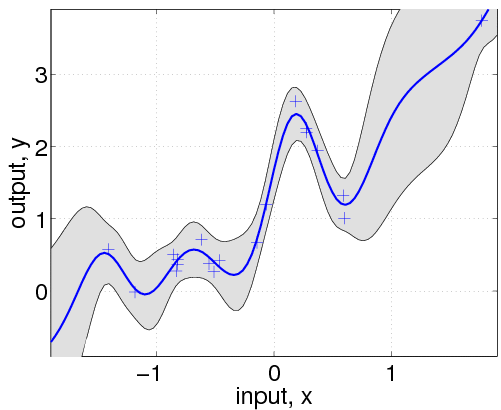

# References
## The bible of GP
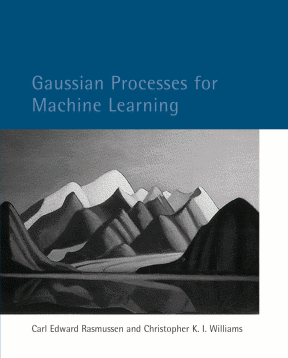

Available online (legally!)
http://www.gaussianprocess.org/gpml/chapters/ 

We will cover mostly Chapter 2 (Regression), Chapter 4 (Covariance Functions), Chapter 5 (Hyperparamaters)


# Gaussian distribution
<img align="right" width="200" height="100" src=https://upload.wikimedia.org/wikipedia/commons/e/ec/Carl_Friedrich_Gauss_1840_by_Jensen.jpg>
<em>There are over 100 topics all named after Gauss</em>
https://en.wikipedia.org/wiki/List_of_things_named_after_Carl_Friedrich_Gauss

## Starting with one variable

The Gaussian distribution is arguably the most ubiquitous distribution in statistics, physics, social sciences, economy, etc.
+ Central Limit Theorem
+ Thermodynamical equilibrium (Maxwell–Boltzmann distribution)
+ Brownian motion
+ etc.

Also called <strong> Normal distribution </strong>


$$p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$


In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
def f(sigma, mu):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*(x-mu)**2/sigma**2))
    plt.ylim(-0.1, 1)
    plt.show()
interactive_plot = interactive(f, sigma=(0, 3.0), mu=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.5, description='sigma', max=3.0), FloatSlider(value=0.0, description…

Why does the peak of the distribution change?



The distribution is normalized:
    
 $$\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)dx=1$$

$$p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
 
The mean (expectation) value of a random variable $x$ normally distributed is

$\mathbb{E}(x) = \int_{-\infty}^\infty p(x) x dx = \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) x dx = \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty \exp\left(-\frac{z^2}{2\sigma^2}\right) (z+\mu) dz$ =


$$\mu$$

$$p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
 
The variance of a random variable $x$ is defined as 

$var(x) = \mathbb{E}(x^2) - \mathbb{E}(x)^2$

When $x$ is normally distributed

$\mathbb{E}(x^2) = \frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^\infty \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right) x^2 dx = \sigma^2 + \mu^2$

$var(x) = \sigma^2$

## Gaussian distribution of 2 variables

If two variables $x$ and $y$ are independent, their <strong> joint</strong> probability is

    
$$p(x,y) = p(x)p(y)$$

$$p(x,y) = \frac{1}{{4\pi}\sigma_x\sigma_y}\exp\left(-\frac{(x-\mu_x)^2}{2\sigma_x^2}-\frac{(y-\mu_y)^2}{2\sigma_y^2}\right)$$


In [2]:
%matplotlib inline
def f(sigma_x, sigma_y):
    fig = plt.figure(figsize=(10, 10))
    xx, yy = np.mgrid[-10:10:0.2, -10:10:0.2]
    f = 1/(4*np.pi)/sigma_x/sigma_y * np.exp(-0.5*(xx**2/sigma_x**2+yy**2/sigma_y**2))
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('PDF')
    fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
interactive_plot = interactive(f, sigma_x=(0, 3.0), sigma_y=(0,3.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=1.5, description='sigma_x', max=3.0), FloatSlider(value=1.5, descripti…

A better way of displaying 2D distributions is by using contour lines (isocontours).

What family of curves are represented by this equation ?

$\frac{(x-\mu_x)^2}{2\sigma_x^2}+\frac{(y-\mu_y)^2}{2\sigma_y^2}=const$ 

In [3]:
def f(sigma_x, sigma_y):
    fig = plt.figure(figsize=(7, 7))
    xx, yy = np.mgrid[-10:10:0.2, -10:10:0.2]
    f = 1/(4*np.pi)/sigma_x/sigma_y * np.exp(-0.5*(xx**2/sigma_x**2+yy**2/sigma_y**2))
    ax = fig.gca()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
    ax.imshow(np.rot90(f), cmap='coolwarm', extent=[-10,10,-10,10]),
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
interactive_plot = interactive(f, sigma_x=(0, 3.0), sigma_y=(0,3.0))
output = interactive_plot.children[-1]
#output.layout.height = '500px'


In [4]:
%matplotlib inline
interactive_plot

interactive(children=(FloatSlider(value=1.5, description='sigma_x', max=3.0), FloatSlider(value=1.5, descripti…

# Matrix form

$$p(x,y) = \frac{1}{{4\pi}\sigma_x\sigma_y}\exp\left(-\frac{(x-\mu_x)^2}{2\sigma_x^2}-\frac{(y-\mu_y)^2}{2\sigma_y^2}\right)$$

The 2D normal distribution can be rewritten as

$$p(x,y) = \frac{1}{4\pi\sigma_x\sigma_y}\exp\left(-\frac{1}{2}\left(\begin{bmatrix}x \\ y \end{bmatrix} -  \begin{bmatrix}\mu_x \\ \mu_y \end{bmatrix}\right)^T \begin{bmatrix} \sigma_x^2 & 0 \\ 0 & \sigma_y^2 \end{bmatrix}^{-1} \left(\begin{bmatrix}x \\ y \end{bmatrix} -  \begin{bmatrix}\mu_x \\ \mu_y \end{bmatrix}\right) \right)$$



that is


$$p(x,y) = \frac{1}{4\pi|\boldsymbol{D}|^{1/2}}\exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \boldsymbol{D}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}) \right)$$


where $\boldsymbol{x} = \begin{bmatrix} x \\ y \end{bmatrix}$ , $\boldsymbol{\mu} = \begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}$, $\boldsymbol{D}=\begin{bmatrix} \sigma_x^2 & 0 \\ 0 & \sigma_y^2 \end{bmatrix}$

We can now introduce a rotation of the coordinates $(x,y)$ via a rotation matrix $\boldsymbol{R}$ such that 
$\boldsymbol{x}\rightarrow\boldsymbol{Rx}$

$$p(x,y) = \frac{1}{4\pi|\boldsymbol{D}|^{1/2}}\exp\left(-\frac{1}{2}(\boldsymbol{Rx}-\boldsymbol{R\mu})^T \boldsymbol{D}^{-1}(\boldsymbol{Rx}-\boldsymbol{R\mu}) \right)$$



which finally reduces to 
$$p(x,y) = \frac{1}{4\pi|\boldsymbol{\Sigma}|^{1/2}}\exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}) \right)$$

with $\boldsymbol{\Sigma}^{-1} = \boldsymbol{R^T}\boldsymbol{D}^{-1}\boldsymbol{R}$


$\boldsymbol{R}$ is a rotation matrix, so it is unitary: $\boldsymbol{R}\boldsymbol{R}^T=\boldsymbol{I}$, hence:

$$\boldsymbol{\Sigma} = \boldsymbol{R^T}\boldsymbol{D}\boldsymbol{R}$$

(proof: $\boldsymbol{I}=\boldsymbol{\Sigma}\boldsymbol{\Sigma}^{-1} = \boldsymbol{R}^T\boldsymbol{D}\boldsymbol{R}\boldsymbol{R}^T\boldsymbol{D}^{-1}\boldsymbol{R}=\boldsymbol{I}$)



This can now be generalized to any number of variables $D$, and we have then derived the general formula for a multivariate Gaussian distribution

$$p(x,y) = \frac{1}{(2\pi\boldsymbol)^{D/2}|{\Sigma}|^{1/2}}\exp\left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu}) \right)$$

for which there is always an appropriate tranformation of variables (rotation) that makes the variables independent.

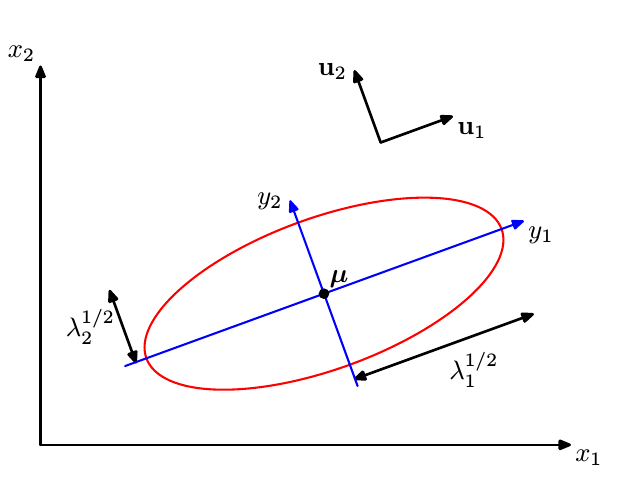

The general rotation matrix for an angle $\theta$ in 2D is 

$R=\begin{bmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta\end{bmatrix}$



In [5]:
def f(sigma_x, sigma_y, theta=0):
    fig = plt.figure(figsize=(7, 7))
    xx, yy = np.mgrid[-5:5:0.1, -5:5:0.1]
    theta = theta /180*np.pi
    R=np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    D_inv=np.matrix([[1/sigma_x**2,0],[0, 1/sigma_y**2]])
    D=np.matrix([[sigma_x**2,0],[0, sigma_y**2]])
    Sigma = np.matmul(np.matmul(np.transpose(R),D),R)
    Sigma_inv = np.matmul(np.matmul(np.transpose(R),D_inv),R)
    f = 1/(4*np.pi)/sigma_x/sigma_y * np.exp(-0.5*(xx**2*Sigma_inv[0,0]+ 2*xx*yy*Sigma_inv[0,1]+yy**2*Sigma_inv[1,1]))
    ax = fig.gca()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
    ax.imshow(np.rot90(f), cmap='coolwarm', extent=[-10,10,-10,10]),
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.text(-4,3,np.core.defchararray.add('$\Sigma^{-1}=$\n',np.array_str(Sigma_inv)), fontsize=16)
    ax.text(-4,-3.5,np.core.defchararray.add('$\Sigma=$\n',np.array_str(Sigma)), fontsize=16)
interactive_plot = interactive(f, sigma_x=(0, 3.0), sigma_y=(0,3.0),theta=(0,180))
output = interactive_plot.children[-1]

In [6]:
interactive_plot

interactive(children=(FloatSlider(value=1.5, description='sigma_x', max=3.0), FloatSlider(value=1.5, descripti…

Something peculiar about these matrices?

They are symmetric!

What if instead we choose to use a matrix $\Sigma^{-1}$ that is NOT symmetric?

(Note: any matrix can be decomposed in the sum of a symmetric and an anti-symmetric matrix)

Exercise: show that the anti-symmetric part disappears from the exponent in the Gaussian


Hence: without loss of generality $\Sigma^{-1}$ can be taken as symmetric.

The inverse of a symmetric matrix is symmetric: $\Sigma$ is also symmetric

$\boldsymbol{\Sigma}$ is called the <strong> Covariance matrix</strong> 
    
$\boldsymbol{\Sigma}^{-1}$ is called the <strong> Precision matrix</strong> 
    

## Covariance

If we have a set of random variables $\boldsymbol{X}=\{X_1,X_2,\ldots,X_D\}$ the <strong>covariance</strong> between two variables is defined as:

$$cov(X_i,X_j)=\mathbb{E}[(X_i-\mathbb{E}[X_i]) (X_j-\mathbb{E}[X_j])]$$

and the covariance matrix is the corresponding matrix of elements $\boldsymbol{K}_{i,j}=cov(X_i,X_j)$. Hence the diagonal entries of the covariance matrix are the variances of each element of $\mathbf{X}$.

$\mathbf{\Sigma}=\begin{bmatrix}cov(X_1,X_1) & cov(X_1,X_2) & \cdots & cov(X_1,X_D) \\ cov(X_2,X_1) & cov(X_2,X_2) & \cdots & cov(X_2,X_D)\\ \vdots & \vdots & \vdots & \vdots\\ cov(X_D,X_1) & cov(X_D,X_2) & \cdots & cov(X_D,X_D) \end{bmatrix}$


Exercise: show that if two random variables $X$ and $Y$ are independent, their covariance is equal to zero.

## Partitioned covariance and precision matrices

Assume we split our $D-$ dimensional set of random variables $\boldsymbol{X}$ in two sets $\boldsymbol{x_a}$ and $\boldsymbol{x_b}$ (each can be multi-dimensional).

Likewise, we can split the mean values in two corresponding sets  $\boldsymbol{\mu_a}$ and $\boldsymbol{\mu_b}$.
The vectors $\boldsymbol{X}$ and $\boldsymbol{\mu}$ can then be expressed as:

$\boldsymbol{X}=\begin{bmatrix}\boldsymbol{x_a}\\ \boldsymbol{x_b}\end{bmatrix} $, $\boldsymbol{\mu}=\begin{bmatrix}\boldsymbol{\mu_a}\\ \boldsymbol{\mu_b}\end{bmatrix} $.

The covariance matrix $\boldsymbol{\Sigma}$ can be partitioned as 

$\boldsymbol{\Sigma}=\begin{bmatrix} \boldsymbol{\Sigma}_{aa} & \boldsymbol{\Sigma}_{ab}\\ \boldsymbol{\Sigma}_{ba} & \boldsymbol{\Sigma}_{bb}\end{bmatrix}$ Notice that $\boldsymbol{\Sigma}_{aa}$ and $\boldsymbol{\Sigma}_{bb}$ are still symmetric, while $\boldsymbol{\Sigma}_{ab}=\boldsymbol{\Sigma}_{ba}^T$

We can also introduce a similar partition for the precision matrix $\boldsymbol\Lambda=\boldsymbol\Sigma^{-1}$:

$\boldsymbol{\Lambda}=\begin{bmatrix} \boldsymbol{\Lambda}_{aa} & \boldsymbol{\Lambda}_{ab}\\ \boldsymbol{\Lambda}_{ba} & \boldsymbol{\Lambda}_{bb}\end{bmatrix}$
However, keep in mind that the partition of the inverse is not equal to the inverse of a partition!
$\boldsymbol{\Lambda}_{aa}\ne\boldsymbol{\Sigma}_{aa}^{-1}$

## When Gaussian always Gaussian 

We can now reason in terms of the D-dimensional multivariate Gaussian distribution defined over the joint set $(\boldsymbol x_a,\boldsymbol x_b)$  as $p(\boldsymbol x_a,\boldsymbol x_b) = \mathcal{N}(\boldsymbol x|\boldsymbol\mu,\boldsymbol{\Sigma})$. 

The Gaussian distribution has unique properties!

+ The marginal distribution $p(\boldsymbol x_a) = \int p(\boldsymbol x_a,\boldsymbol x_b) d\boldsymbol x_b$ is Gaussian
+ The conditional distribution $p(\boldsymbol x_a|\boldsymbol x_b) = \frac{p(\boldsymbol x_a,\boldsymbol x_b)}{p(\boldsymbol x_b)} = \frac{p(\boldsymbol x_a,\boldsymbol x_b)}{\int p(\boldsymbol x_a,\boldsymbol x_b)  d\boldsymbol x_a}$ is Gaussian


## Marginal distribution

$p(\boldsymbol x_a, \boldsymbol x_b)=\mathcal{N}\left(\boldsymbol x|\begin{bmatrix}\boldsymbol{\mu_a}\\ \boldsymbol{\mu_b}\end{bmatrix}  ,\begin{bmatrix} \boldsymbol{\Sigma}_{aa} & \boldsymbol{\Sigma}_{ab}\\ \boldsymbol{\Sigma}_{ba} & \boldsymbol{\Sigma}_{bb}\end{bmatrix}\right)$

The marginal distribution is obtained when we 'marginalize' (ie integrate) the distribution over a set of random variables. In the 2D graphical representation this can be understood as collapsing the distribution over one axes.

What are the mean and covariance matrix of the marginal distribution ?


$p(\boldsymbol x_a) = \int p(\boldsymbol x_a,\boldsymbol x_b) d\boldsymbol x_b = \mathcal{N}(\boldsymbol x_a| ?, ?)$ 

$p(\boldsymbol x_a) = \int p(\boldsymbol x_a,\boldsymbol x_b) d\boldsymbol x_b = \mathcal{N}(\boldsymbol x_a| \boldsymbol \mu_a, \boldsymbol \Sigma_{aa})$ 

## Conditional distribution
Whereas the result for the marginal distribution is somewhat intuitive, a less intuitive result holds for the conditional distribution, which we derive here.

The conditional distribution $p(\boldsymbol x_a| \boldsymbol x_b)$ is simply evaluated by considering the joint distribution $p(\boldsymbol x_a,\boldsymbol x_b)$ and considering $\boldsymbol x_b$ as a constant.

Using the partioning introduced above for $\boldsymbol x$, $\boldsymbol \mu$ and the precision matrix $\boldsymbol\Lambda$, we have:

$(\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})=(\boldsymbol{x_a}-\boldsymbol{\mu_a})^T\boldsymbol{\Lambda}_{aa}(\boldsymbol{x_a}-\boldsymbol{\mu_a})+2(\boldsymbol{x_a}-\boldsymbol{\mu_a})^T\boldsymbol{\Lambda}_{ab}(\boldsymbol{x_b}-\boldsymbol{\mu_b})+(\boldsymbol{x_b}-\boldsymbol{\mu_b})^T\boldsymbol{\Lambda}_{bb}(\boldsymbol{x_b}-\boldsymbol{\mu_b})$



Now, we expect $p(\boldsymbol x_a| \boldsymbol x_b)\sim\mathcal N(\boldsymbol x_a|\boldsymbol\mu_{a|b},\boldsymbol\Sigma_{a|b})$. 
A general form for the argument of the exponent is

$(\boldsymbol{x}_a-\boldsymbol{\mu_{a|b}})^T\boldsymbol{\Sigma}^{-1}_{a|b}(\boldsymbol{x}_a-\boldsymbol{\mu}_{a|b})=\boldsymbol x_a^T \boldsymbol{\Sigma}^{-1}_{a|b} \boldsymbol x_a -2 \boldsymbol x_a^T \boldsymbol{\Sigma}^{-1}_{a|b}\boldsymbol \mu_{a|b} + \boldsymbol \mu^T_{a|b} \boldsymbol{\Sigma}^{-1}_{a|b} \boldsymbol \mu_{a|b}$ (where we have used the symmetry of $\boldsymbol\Sigma_{a|b}$).
 

$(\boldsymbol{x}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})=(\boldsymbol{x_a}-\boldsymbol{\mu_a})^T\boldsymbol{\Lambda}_{aa}(\boldsymbol{x_a}-\boldsymbol{\mu_a})+2(\boldsymbol{x_a}-\boldsymbol{\mu_a})^T\boldsymbol{\Lambda}_{ab}(\boldsymbol{x_b}-\boldsymbol{\mu_b})+(\boldsymbol{x_b}-\boldsymbol{\mu_b})^T\boldsymbol{\Lambda}_{bb}(\boldsymbol{x_b}-\boldsymbol{\mu_b})$

$(\boldsymbol{x}_a-\boldsymbol{\mu_{a|b}})^T\boldsymbol{\Sigma}^{-1}_{a|b}(\boldsymbol{x}_a-\boldsymbol{\mu}_{a|b})=\boldsymbol x_a^T \boldsymbol{\Sigma}^{-1}_{a|b} \boldsymbol x_a -2 \boldsymbol x_a^T \boldsymbol{\Sigma}^{-1}_{a|b}\boldsymbol \mu_{a|b} + \boldsymbol \mu^T_{a|b} \boldsymbol{\Sigma}^{-1}_{a|b} \boldsymbol \mu_{a|b}$ 

It is now sufficient to equate equal terms in $\boldsymbol x_a$ in the above two equations.

Terms in $\boldsymbol x_a^2\longrightarrow$: $\boldsymbol x_a^T \boldsymbol{\Sigma}^{-1}_{a|b} \boldsymbol x_a = \boldsymbol x_a^T \boldsymbol{\Lambda}_{aa} \boldsymbol x_a$, from which $\boldsymbol{\Sigma}_{a|b} = \boldsymbol{\Lambda}_{aa}^{-1}$

Terms in $\boldsymbol x_a\longrightarrow$: $2\boldsymbol x_a^T(-\boldsymbol\Lambda_{aa}\boldsymbol\mu_a+\boldsymbol\Lambda_{ab}\boldsymbol (\boldsymbol x_b-\boldsymbol \mu_b))= -2\boldsymbol x_a^T\boldsymbol\Sigma^{-1}_{a|b}\boldsymbol\mu_{a|b}$  from which $\boldsymbol\mu_{a|b}=\Sigma_{a|b}(\boldsymbol\Lambda_{aa}\boldsymbol\mu_a-\boldsymbol\Lambda_{ab}\boldsymbol (\boldsymbol x_b-\boldsymbol \mu_b))=\boldsymbol\mu_a-\boldsymbol\Lambda_{aa}^{-1}\boldsymbol\Lambda_{ab}\boldsymbol (\boldsymbol x_b-\boldsymbol \mu_b)$


So far we have:

$\boldsymbol{\Sigma}_{a|b} = \boldsymbol{\Lambda}_{aa}^{-1}$

$\boldsymbol\mu_{a|b}=\boldsymbol\mu_a-\boldsymbol\Lambda_{aa}^{-1}\boldsymbol\Lambda_{ab}\boldsymbol (\boldsymbol x_b-\boldsymbol \mu_b)$

However, we would like to express the covariance matrix and the mean of the conditional distribution $p(\boldsymbol x_a| \boldsymbol x_b)$ in terms of the partioned co-variance matrix and mean of the full distribution. We need to use the following identity that relates the inverse of a partitioned matrix, with the partition of the inverse:

$\begin{bmatrix}A & B \\ C & D\end{bmatrix}^{-1} = \begin{bmatrix}(A-BD^{-1}C)^{-1} & -(A-BD^{-1}C)^{-1}BD^{-1} \\-D^{-1}C(A-BD^{-1}C)^{-1} & D^{-1}+D^{-1}C(A-BD^{-1}C)^{-1}BD^{-1} \end{bmatrix}$

In our case

$\boldsymbol{\begin{bmatrix}\boldsymbol\Sigma_{aa} & \boldsymbol\Sigma_{ab} \\ \boldsymbol\Sigma_{ba} & \boldsymbol\Sigma_{bb}\end{bmatrix}^{-1} = \begin{bmatrix}\boldsymbol\Lambda_{aa} & \boldsymbol\Lambda_{ab} \\ \boldsymbol\Lambda_{ba} & \boldsymbol\Lambda_{bb}\end{bmatrix}}$

Hence: $\boldsymbol\Lambda_{aa} = (\boldsymbol\Sigma_{aa}- \boldsymbol\Sigma_{ab}\boldsymbol\Sigma_{bb}^{-1}\boldsymbol\Sigma_{ba})^{-1}$ and $\boldsymbol\Lambda_{ab} = - (\boldsymbol\Sigma_{aa}- \boldsymbol\Sigma_{ab}\boldsymbol\Sigma_{bb}^{-1}\boldsymbol\Sigma_{ba})^{-1}\boldsymbol\Sigma_{ab}\boldsymbol\Sigma_{bb}^{-1}$

and finally:

\begin{equation}\boxed{\boldsymbol\mu_{a|b}=\boldsymbol\mu_a+\boldsymbol\Sigma_{ab}\boldsymbol\Sigma_{bb}^{-1}(\boldsymbol x_b - \boldsymbol\mu_b) \\ 
\boldsymbol\Sigma_{a|b} = \boldsymbol\Sigma_{aa} - \boldsymbol\Sigma_{ab}\boldsymbol\Sigma_{bb}^{-1}\boldsymbol\Sigma_{ba}} \end{equation}

In [7]:
## Example with a 2D distribution

def f(mu_a, mu_b, x_b=0, sigma_aa=1, sigma_bb=1, sigma_ab=0):
    fig = plt.figure(figsize=(7, 7))
    xx, yy = np.mgrid[-5:5:0.1, -5:5:0.1]
    y=np.linspace(-5,5,100)
    Sigma = np.matrix([[sigma_aa,sigma_ab],[sigma_ab, sigma_bb]])
    Sigma_inv = np.linalg.inv(Sigma)
    Sigma_det = np.linalg.det(Sigma)
    f = 1/(4*np.pi)/np.sqrt(Sigma_det) * np.exp(-0.5*((xx-mu_a)**2*Sigma_inv[0,0]+ 2*(xx-mu_a)*(yy-mu_b)*Sigma_inv[0,1]+(yy-mu_b)**2*Sigma_inv[1,1]))
    mu_ab = mu_a +sigma_ab/sigma_bb*(x_b-mu_b)
    Sigma_cond = sigma_aa-sigma_ab**2/sigma_bb
    ax = fig.gca()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.plot([-5, 5],[x_b,x_b], color='black')
    ax.plot(y,x_b+ 1/np.sqrt(2*np.pi)/Sigma_cond * np.exp(-0.5*(y-mu_ab)**2/Sigma_cond**2), color='yellow', linewidth=2)
    ax.set_xlabel('x_a', fontsize=16)
    ax.set_ylabel('x_b', fontsize=16)
    ax.text(-4,3,np.core.defchararray.add('$\Sigma^{-1}=$\n',np.array_str(Sigma_inv)), fontsize=16)
    ax.text(-4,-3.5,np.core.defchararray.add('$\Sigma=$\n',np.array_str(Sigma)), fontsize=16)
interactive_plot = interactive(f, sigma_aa=(0, 3.0), sigma_bb=(0,3.0), sigma_ab=(0,3.0), mu_a=(-2.0,2.0), mu_b=(-2.0,2.0),x_b=(-2.0,2.0))
output = interactive_plot.children[-1]

In [9]:
interactive_plot

interactive(children=(FloatSlider(value=-0.6, description='mu_a', max=2.0, min=-2.0), FloatSlider(value=0.8, d…

What are the interesting properties of $\boldsymbol\mu_{a|b}$ and $\boldsymbol\Sigma_{a|b}$ ??

$\boldsymbol\mu_{a|b}$ depends linearly on $\boldsymbol x_b$

$\boldsymbol\Sigma_{a|b}$ depends on all partitions of $\boldsymbol\Sigma$ but it is INDEPENDENT of $\boldsymbol x_b$  

## End of Part 1 !!